In [1]:
import csv
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = '/home/dylan/PycharmProjects/battery/'

In [3]:
def update_data():
    array = []

    with open(file_path+'battery_logs.csv', mode='r') as logs:
            reader = csv.reader(logs, delimiter='\t', quotechar='"', quoting=csv.QUOTE_MINIMAL)

            for row in reader:
                array.append([row[0],row[1],row[2]])

    return np.array(array)

In [4]:
def get_data(array):
    
    date_time = []
    for t_str in array[:,0]:
        date = datetime.strptime(t_str, '%Y-%m-%d %H:%M:%S.%f')
        date_time.append(date)

    # # base data
    date_time = np.array(date_time)
    percent = np.array(array[:,1], dtype=float)
    plugged = array[:,2] == 'True'

    on_battery = date_time[plugged], percent[plugged]
    off_battery = date_time[plugged^True], percent[plugged^True]

    return date_time, percent, plugged, on_battery, off_battery

In [5]:
datetime.now()

datetime.datetime(2020, 2, 8, 12, 40, 11, 550900)

In [6]:
def date_limits(date_time, percent, plugged, on_battery, off_battery, delta = timedelta(days=1)):
    now = datetime.now()
    indices = []
    
    for i in range(len(date_time)):
        if now - date_time[i] < delta :
            indices.append(i)
            
#     print(indices)
    date_time_out   = date_time[indices]
    percent_out     = percent[indices]
    plugged_out     = plugged[indices]
    
    on_battery_out  = date_time_out[plugged_out],      percent_out[plugged_out]
    off_battery_out = date_time_out[plugged_out^True], percent_out[plugged_out^True]            
            
    return date_time_out, percent_out, plugged_out, on_battery_out, off_battery_out

In [7]:
_green       = '#007000'
_light_green = '#8BC34A' #'#CDDC39'
_yellow      = '#FFBF00'
_red         = '#D84315' #'#E65100' #'#D2222D'
_light_red   = '#FF9800' #'#FFB300' #'#FFCA28' #'#F39C12'
alpha = 0.5


def plot_logs(date_time, percent, plugged, on_battery, off_battery):
    fig = plt.figure(figsize = (12,4))

    plt.plot(on_battery[0], on_battery[1],'.g');
    plt.plot(off_battery[0], off_battery[1],'.r');


    i_0 = 0
    toggle = plugged[0]
    date_0 = date_time[0]
    for i in range(1,len(plugged)):
        date = date_time[i]

        if date-date_0 > timedelta(minutes=3):
            
            if percent[i] > percent[i-1]:
                plt.fill_between(date_time[i-1:i+1], percent[i-1:i+1], alpha=.7,color=_light_green);
            else:
                plt.fill_between(date_time[i-1:i+1], percent[i-1:i+1], alpha=.5,color=_light_red);

            

            if toggle:
                plt.fill_between(date_time[i_0:i], percent[i_0:i], alpha=alpha ,color=_green);
            else:
                plt.fill_between(date_time[i_0:i], percent[i_0:i], alpha=alpha ,color=_red);

            i_0 = i

        elif toggle != plugged[i]:

            if toggle:
                plt.fill_between(date_time[i_0:i+1], percent[i_0:i+1], alpha=alpha ,color=_green);
            else:
                plt.fill_between(date_time[i_0:i+1], percent[i_0:i+1], alpha=alpha ,color=_red);

            i_0 = i

        elif i == len(plugged)-1:
            if plugged[i]:
                plt.fill_between(date_time[i_0:i+1], percent[i_0:i+1], alpha=alpha ,color=_green);
            else:
                plt.fill_between(date_time[i_0:i+1], percent[i_0:i+1], alpha=alpha ,color=_red); 


        toggle = plugged[i]
        date_0 = date 


    plt.ylim([0,100])
    plt.grid(linestyle='dotted')

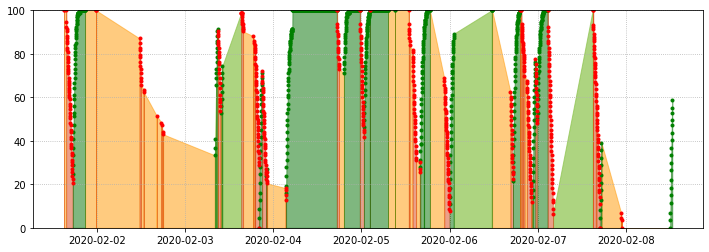

In [8]:
delta = timedelta(weeks=1)
plot_logs(*date_limits(*get_data(update_data()),delta))

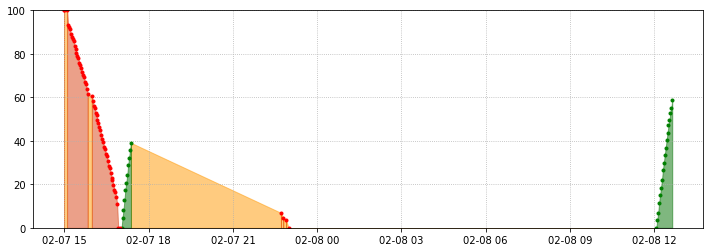

In [9]:
delta = timedelta(days=1)
plot_logs(*date_limits(*get_data(update_data()),delta))

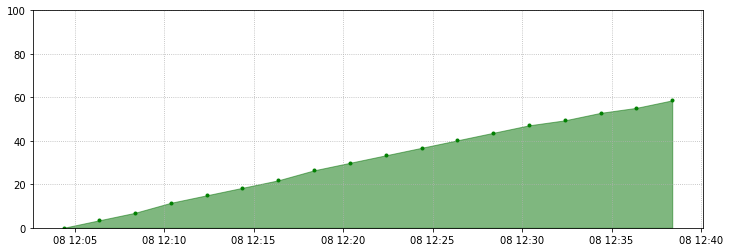

In [10]:
delta = timedelta(hours=12)
plot_logs(*date_limits(*get_data(update_data()),delta))

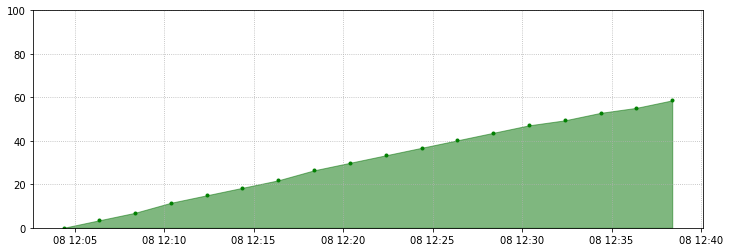

In [11]:
delta = timedelta(hours=3)
plot_logs(*date_limits(*get_data(update_data()),delta))